# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/home/samir/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


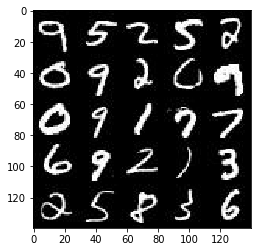

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

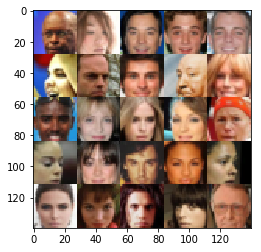

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/samir/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32,[None,image_width, image_height, image_channels], name = 'real_input')
    z_data = tf.placeholder(tf.float32,[None, z_dim], name = 'z_data')
    learning_rate = tf.placeholder(tf.float32,[], name = 'learning_rate')

    return real_input, z_data, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse):
        alpha = 0.05
        keep_prob = 0.6
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        conv1 = tf.maximum(alpha * conv1, conv1)
        drop0 = tf.layers.dropout(conv1, keep_prob)

        
        conv2 = tf.layers.conv2d(drop0, 128, 5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        drop1 = tf.layers.dropout(conv2, keep_prob)

        
        conv3 = tf.layers.conv2d(drop1, 256, 5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)
        drop2 = tf.layers.dropout(conv3, keep_prob)


        flat = tf.reshape(drop2, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        alpha = 0.1
        keep_prob = 0.5
        
        conv1 = tf.layers.dense(z, 4*4*1024)
        conv1 = tf.reshape(conv1, (-1, 4, 4, 1024))
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = conv1*tf.sigmoid(conv1) #swish
        drop0 = tf.layers.dropout(conv1, keep_prob, training=is_train)

        conv2 = tf.layers.conv2d_transpose(drop0, 512, 4, 1, 'valid')
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = conv2*tf.sigmoid(conv2)
        drop1 = tf.layers.dropout(conv2, keep_prob, training=is_train)

        conv3 = tf.layers.conv2d_transpose(drop1, 256, 5, 2, 'same')
        conv3 = tf.layers.batch_normalization(conv3, training=is_train)
        conv3 = conv3*tf.sigmoid(conv3)
        drop2 = tf.layers.dropout(conv3, keep_prob, training=is_train)
        
        conv4 = tf.layers.conv2d_transpose(drop1, 128, 5, 2, 'same')
        conv4 = tf.layers.batch_normalization(conv4, training=is_train)
        conv4 = conv4*tf.sigmoid(conv4)
        drop3 = tf.layers.dropout(conv4, keep_prob, training=is_train)

        logits = tf.layers.conv2d_transpose(drop3, out_channel_dim, 5, 2, 'same')

        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_ = generator(input_z, out_channel_dim, is_train = True)
    d_real, d_logits_real = discriminator(input_real, reuse = False)
    d_fake, d_logits_fake = discriminator(g_, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    dis_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]

    
    with tf.control_dependencies(gen_updates):
        g_train_operation = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)    
    d_train_operation = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)


    return d_train_operation, g_train_operation

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    im_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(im_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_channels = 1
    if(data_image_mode == 'RGB'):
        image_channels = 3
        
    image_width = data_shape[1]
    image_height = data_shape[2]
    
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    learn_rate = learning_rate
    d_loss, g_loss = model_loss(input_real, input_z, image_channels )
    d_train_operation, g_train_operation = model_opt(d_loss, g_loss, learn_rate, beta1)

    step = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_im in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_im *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                __ = sess.run(d_train_operation, feed_dict={input_real: batch_im, input_z: batch_z})
                __ = sess.run(g_train_operation, feed_dict={input_z: batch_z})                
                __ = sess.run(g_train_operation, feed_dict={input_z: batch_z})
                if (step%100 == 0):
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                if (step%10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_im})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("\n In epoch {}/{} and step {}".format(epoch_i+1, epochs, step),
                          "The discriminator Loss is {:.5f}...".format(train_loss_d),
                              "The generator Loss is {:.5f}".format(train_loss_g))   
            #get the losses and print
            train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_im})
            train_loss_g = g_loss.eval({input_z: batch_z})
            print("\n In epoch {}/{}...".format(epoch_i+1, epochs),
                  "The discriminator Loss is {:.5f}...".format(train_loss_d),
                  "The generator Loss: {:.5f}".format(train_loss_g))


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.


 In epoch 1/2 and step 10 The discriminator Loss is 0.94039... The generator Loss is 2.37599

 In epoch 1/2 and step 20 The discriminator Loss is 5.13425... The generator Loss is 0.40886

 In epoch 1/2 and step 30 The discriminator Loss is 0.89856... The generator Loss is 3.28225

 In epoch 1/2 and step 40 The discriminator Loss is 1.12595... The generator Loss is 0.97079

 In epoch 1/2 and step 50 The discriminator Loss is 1.05846... The generator Loss is 0.96683

 In epoch 1/2 and step 60 The discriminator Loss is 0.48452... The generator Loss is 3.51268

 In epoch 1/2 and step 70 The discriminator Loss is 1.41390... The generator Loss is 2.80564

 In epoch 1/2 and step 80 The discriminator Loss is 0.81271... The generator Loss is 1.58925

 In epoch 1/2 and step 90 The discriminator Loss is 0.90491... The generator Loss is 1.12508


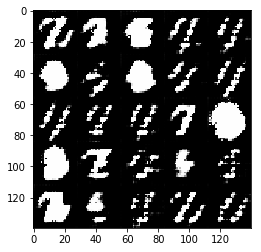


 In epoch 1/2 and step 100 The discriminator Loss is 0.45110... The generator Loss is 2.52944

 In epoch 1/2 and step 110 The discriminator Loss is 1.18759... The generator Loss is 1.07160

 In epoch 1/2 and step 120 The discriminator Loss is 2.29266... The generator Loss is 0.26106

 In epoch 1/2 and step 130 The discriminator Loss is 0.80002... The generator Loss is 1.68594

 In epoch 1/2 and step 140 The discriminator Loss is 1.14873... The generator Loss is 0.98000

 In epoch 1/2 and step 150 The discriminator Loss is 1.06243... The generator Loss is 1.55674

 In epoch 1/2 and step 160 The discriminator Loss is 2.06027... The generator Loss is 2.35690

 In epoch 1/2 and step 170 The discriminator Loss is 3.06654... The generator Loss is 0.11814

 In epoch 1/2 and step 180 The discriminator Loss is 0.80093... The generator Loss is 1.33087

 In epoch 1/2 and step 190 The discriminator Loss is 0.94493... The generator Loss is 1.10563


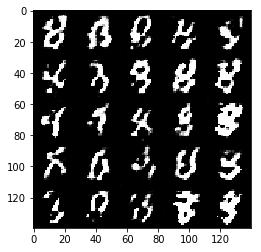


 In epoch 1/2 and step 200 The discriminator Loss is 1.75341... The generator Loss is 0.44874

 In epoch 1/2 and step 210 The discriminator Loss is 1.50801... The generator Loss is 0.66072

 In epoch 1/2 and step 220 The discriminator Loss is 1.00706... The generator Loss is 0.88744

 In epoch 1/2 and step 230 The discriminator Loss is 0.83991... The generator Loss is 1.08612

 In epoch 1/2 and step 240 The discriminator Loss is 0.80942... The generator Loss is 1.17606

 In epoch 1/2 and step 250 The discriminator Loss is 0.67910... The generator Loss is 1.35627

 In epoch 1/2 and step 260 The discriminator Loss is 0.69228... The generator Loss is 1.26569

 In epoch 1/2 and step 270 The discriminator Loss is 2.69140... The generator Loss is 0.19945

 In epoch 1/2 and step 280 The discriminator Loss is 1.65268... The generator Loss is 1.98669

 In epoch 1/2 and step 290 The discriminator Loss is 1.32875... The generator Loss is 0.81914


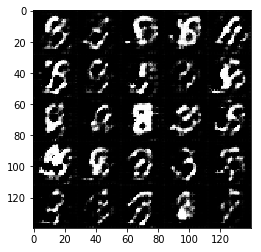


 In epoch 1/2 and step 300 The discriminator Loss is 1.11922... The generator Loss is 0.90512

 In epoch 1/2 and step 310 The discriminator Loss is 0.86962... The generator Loss is 2.65410

 In epoch 1/2 and step 320 The discriminator Loss is 1.44234... The generator Loss is 0.67388

 In epoch 1/2 and step 330 The discriminator Loss is 0.83061... The generator Loss is 1.34110

 In epoch 1/2 and step 340 The discriminator Loss is 1.19631... The generator Loss is 0.74583

 In epoch 1/2 and step 350 The discriminator Loss is 0.74674... The generator Loss is 3.61911

 In epoch 1/2 and step 360 The discriminator Loss is 2.77690... The generator Loss is 4.90128

 In epoch 1/2 and step 370 The discriminator Loss is 0.58295... The generator Loss is 2.57424

 In epoch 1/2 and step 380 The discriminator Loss is 0.55352... The generator Loss is 2.79427

 In epoch 1/2 and step 390 The discriminator Loss is 0.56088... The generator Loss is 1.88106


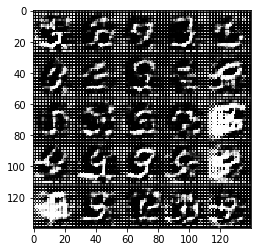


 In epoch 1/2 and step 400 The discriminator Loss is 0.66707... The generator Loss is 1.57614

 In epoch 1/2 and step 410 The discriminator Loss is 1.08842... The generator Loss is 0.95990

 In epoch 1/2 and step 420 The discriminator Loss is 1.29558... The generator Loss is 0.95410

 In epoch 1/2 and step 430 The discriminator Loss is 2.24283... The generator Loss is 0.23367

 In epoch 1/2 and step 440 The discriminator Loss is 1.21077... The generator Loss is 1.31841

 In epoch 1/2 and step 450 The discriminator Loss is 1.12304... The generator Loss is 0.74968

 In epoch 1/2 and step 460 The discriminator Loss is 1.28846... The generator Loss is 0.66501

 In epoch 1/2 and step 470 The discriminator Loss is 1.13966... The generator Loss is 0.79133

 In epoch 1/2 and step 480 The discriminator Loss is 1.11541... The generator Loss is 1.00281

 In epoch 1/2 and step 490 The discriminator Loss is 1.07773... The generator Loss is 1.06271


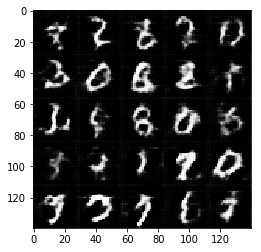


 In epoch 1/2 and step 500 The discriminator Loss is 1.39246... The generator Loss is 0.59616

 In epoch 1/2 and step 510 The discriminator Loss is 1.04214... The generator Loss is 1.27353

 In epoch 1/2 and step 520 The discriminator Loss is 1.18926... The generator Loss is 1.54110

 In epoch 1/2 and step 530 The discriminator Loss is 1.13300... The generator Loss is 0.93418

 In epoch 1/2 and step 540 The discriminator Loss is 1.10564... The generator Loss is 0.94058

 In epoch 1/2 and step 550 The discriminator Loss is 1.66805... The generator Loss is 1.70908

 In epoch 1/2 and step 560 The discriminator Loss is 0.97344... The generator Loss is 1.27222

 In epoch 1/2 and step 570 The discriminator Loss is 1.24059... The generator Loss is 0.68935

 In epoch 1/2 and step 580 The discriminator Loss is 0.96591... The generator Loss is 1.37146

 In epoch 1/2 and step 590 The discriminator Loss is 1.52502... The generator Loss is 0.55038


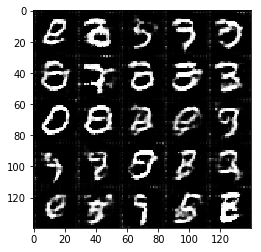


 In epoch 1/2 and step 600 The discriminator Loss is 1.19151... The generator Loss is 0.70259

 In epoch 1/2 and step 610 The discriminator Loss is 1.00160... The generator Loss is 1.07077

 In epoch 1/2 and step 620 The discriminator Loss is 1.08040... The generator Loss is 1.07622

 In epoch 1/2 and step 630 The discriminator Loss is 1.49819... The generator Loss is 0.49132

 In epoch 1/2 and step 640 The discriminator Loss is 0.98275... The generator Loss is 1.00069

 In epoch 1/2 and step 650 The discriminator Loss is 1.11156... The generator Loss is 0.81005

 In epoch 1/2 and step 660 The discriminator Loss is 2.07802... The generator Loss is 0.41789

 In epoch 1/2 and step 670 The discriminator Loss is 1.25698... The generator Loss is 0.75848

 In epoch 1/2 and step 680 The discriminator Loss is 0.83301... The generator Loss is 1.35140

 In epoch 1/2 and step 690 The discriminator Loss is 0.97430... The generator Loss is 0.87004


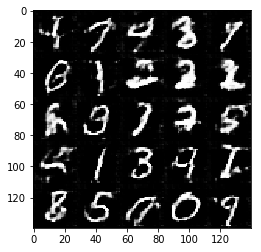


 In epoch 1/2 and step 700 The discriminator Loss is 0.95588... The generator Loss is 1.11610

 In epoch 1/2 and step 710 The discriminator Loss is 0.98541... The generator Loss is 1.80615

 In epoch 1/2 and step 720 The discriminator Loss is 1.46294... The generator Loss is 0.58975

 In epoch 1/2 and step 730 The discriminator Loss is 1.18948... The generator Loss is 0.74307

 In epoch 1/2 and step 740 The discriminator Loss is 1.07975... The generator Loss is 0.72385

 In epoch 1/2 and step 750 The discriminator Loss is 0.91081... The generator Loss is 1.09976

 In epoch 1/2 and step 760 The discriminator Loss is 1.12821... The generator Loss is 0.85012

 In epoch 1/2 and step 770 The discriminator Loss is 0.75728... The generator Loss is 2.06990

 In epoch 1/2 and step 780 The discriminator Loss is 1.15043... The generator Loss is 1.00449

 In epoch 1/2 and step 790 The discriminator Loss is 0.62264... The generator Loss is 1.78728


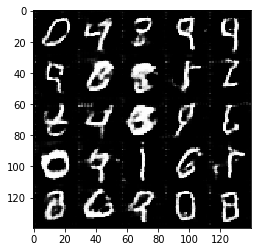


 In epoch 1/2 and step 800 The discriminator Loss is 1.12025... The generator Loss is 0.91907

 In epoch 1/2 and step 810 The discriminator Loss is 0.98435... The generator Loss is 1.09696

 In epoch 1/2 and step 820 The discriminator Loss is 0.77650... The generator Loss is 1.35499

 In epoch 1/2 and step 830 The discriminator Loss is 2.90895... The generator Loss is 0.15737

 In epoch 1/2 and step 840 The discriminator Loss is 1.01566... The generator Loss is 1.00657

 In epoch 1/2 and step 850 The discriminator Loss is 1.57673... The generator Loss is 0.47938

 In epoch 1/2 and step 860 The discriminator Loss is 1.24609... The generator Loss is 2.57797

 In epoch 1/2 and step 870 The discriminator Loss is 1.46005... The generator Loss is 0.69337

 In epoch 1/2 and step 880 The discriminator Loss is 1.76661... The generator Loss is 0.38919

 In epoch 1/2 and step 890 The discriminator Loss is 1.05670... The generator Loss is 1.24485


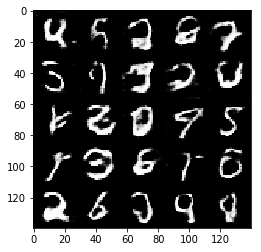


 In epoch 1/2 and step 900 The discriminator Loss is 0.64754... The generator Loss is 1.96070

 In epoch 1/2 and step 910 The discriminator Loss is 0.99624... The generator Loss is 1.38520

 In epoch 1/2 and step 920 The discriminator Loss is 0.92187... The generator Loss is 1.21720

 In epoch 1/2 and step 930 The discriminator Loss is 0.93952... The generator Loss is 1.01082

 In epoch 1/2 and step 940 The discriminator Loss is 1.97827... The generator Loss is 3.98880

 In epoch 1/2 and step 950 The discriminator Loss is 1.02979... The generator Loss is 1.91120

 In epoch 1/2 and step 960 The discriminator Loss is 0.53923... The generator Loss is 2.78526

 In epoch 1/2 and step 970 The discriminator Loss is 0.85121... The generator Loss is 1.59161

 In epoch 1/2 and step 980 The discriminator Loss is 0.86386... The generator Loss is 1.23967

 In epoch 1/2 and step 990 The discriminator Loss is 0.97617... The generator Loss is 1.16380


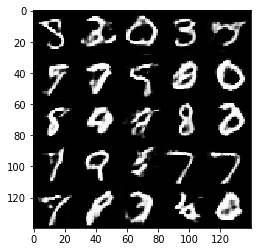


 In epoch 1/2 and step 1000 The discriminator Loss is 0.74121... The generator Loss is 1.40909

 In epoch 1/2 and step 1010 The discriminator Loss is 0.77987... The generator Loss is 1.69070

 In epoch 1/2 and step 1020 The discriminator Loss is 0.92934... The generator Loss is 1.23160

 In epoch 1/2 and step 1030 The discriminator Loss is 1.36713... The generator Loss is 1.01308

 In epoch 1/2 and step 1040 The discriminator Loss is 1.03126... The generator Loss is 0.71146

 In epoch 1/2 and step 1050 The discriminator Loss is 1.02401... The generator Loss is 1.23310

 In epoch 1/2 and step 1060 The discriminator Loss is 0.74025... The generator Loss is 1.96467

 In epoch 1/2 and step 1070 The discriminator Loss is 0.61696... The generator Loss is 1.90213

 In epoch 1/2 and step 1080 The discriminator Loss is 0.61146... The generator Loss is 2.05214

 In epoch 1/2 and step 1090 The discriminator Loss is 2.20328... The generator Loss is 0.46261


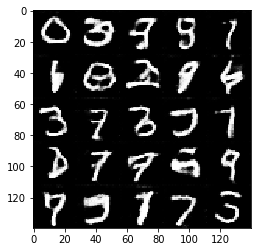


 In epoch 1/2 and step 1100 The discriminator Loss is 0.59592... The generator Loss is 2.67657

 In epoch 1/2 and step 1110 The discriminator Loss is 1.14087... The generator Loss is 0.85557

 In epoch 1/2 and step 1120 The discriminator Loss is 0.93703... The generator Loss is 1.11093

 In epoch 1/2 and step 1130 The discriminator Loss is 0.93409... The generator Loss is 1.52700

 In epoch 1/2 and step 1140 The discriminator Loss is 0.78108... The generator Loss is 1.44170

 In epoch 1/2 and step 1150 The discriminator Loss is 1.15156... The generator Loss is 1.13086

 In epoch 1/2 and step 1160 The discriminator Loss is 0.55842... The generator Loss is 2.31185

 In epoch 1/2 and step 1170 The discriminator Loss is 0.91408... The generator Loss is 3.43666

 In epoch 1/2 and step 1180 The discriminator Loss is 0.69787... The generator Loss is 1.44820

 In epoch 1/2 and step 1190 The discriminator Loss is 1.02389... The generator Loss is 1.59164


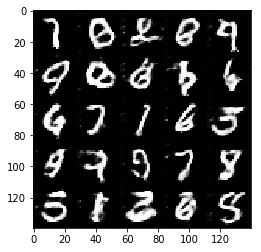


 In epoch 1/2 and step 1200 The discriminator Loss is 0.91465... The generator Loss is 0.93476

 In epoch 1/2 and step 1210 The discriminator Loss is 0.93403... The generator Loss is 2.09809

 In epoch 1/2 and step 1220 The discriminator Loss is 0.66094... The generator Loss is 1.33103

 In epoch 1/2 and step 1230 The discriminator Loss is 0.69769... The generator Loss is 2.13494

 In epoch 1/2 and step 1240 The discriminator Loss is 0.85926... The generator Loss is 0.98859

 In epoch 1/2 and step 1250 The discriminator Loss is 1.64191... The generator Loss is 4.02451

 In epoch 1/2 and step 1260 The discriminator Loss is 0.71174... The generator Loss is 1.62009

 In epoch 1/2 and step 1270 The discriminator Loss is 2.05111... The generator Loss is 0.39311

 In epoch 1/2 and step 1280 The discriminator Loss is 1.69756... The generator Loss is 0.58573

 In epoch 1/2 and step 1290 The discriminator Loss is 0.96045... The generator Loss is 1.19674


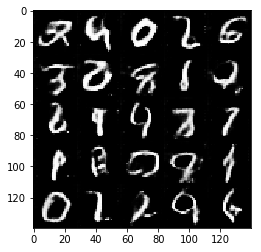


 In epoch 1/2 and step 1300 The discriminator Loss is 0.77014... The generator Loss is 2.16276

 In epoch 1/2 and step 1310 The discriminator Loss is 1.17324... The generator Loss is 1.08220

 In epoch 1/2 and step 1320 The discriminator Loss is 0.55720... The generator Loss is 1.89392

 In epoch 1/2 and step 1330 The discriminator Loss is 0.72160... The generator Loss is 1.45545

 In epoch 1/2 and step 1340 The discriminator Loss is 1.13297... The generator Loss is 1.02901

 In epoch 1/2 and step 1350 The discriminator Loss is 1.17733... The generator Loss is 1.03766

 In epoch 1/2 and step 1360 The discriminator Loss is 1.29580... The generator Loss is 0.74886

 In epoch 1/2 and step 1370 The discriminator Loss is 0.60696... The generator Loss is 1.57567

 In epoch 1/2 and step 1380 The discriminator Loss is 0.51921... The generator Loss is 2.49642

 In epoch 1/2 and step 1390 The discriminator Loss is 1.60139... The generator Loss is 5.22855


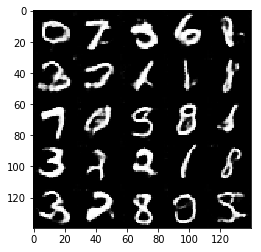


 In epoch 1/2 and step 1400 The discriminator Loss is 1.31592... The generator Loss is 0.82572

 In epoch 1/2 and step 1410 The discriminator Loss is 1.09738... The generator Loss is 1.20469

 In epoch 1/2 and step 1420 The discriminator Loss is 0.63954... The generator Loss is 2.12126

 In epoch 1/2 and step 1430 The discriminator Loss is 0.88125... The generator Loss is 1.02111

 In epoch 1/2 and step 1440 The discriminator Loss is 0.45236... The generator Loss is 2.64990

 In epoch 1/2 and step 1450 The discriminator Loss is 0.44113... The generator Loss is 2.45507

 In epoch 1/2 and step 1460 The discriminator Loss is 0.44133... The generator Loss is 2.69586

 In epoch 1/2 and step 1470 The discriminator Loss is 0.60677... The generator Loss is 2.14380

 In epoch 1/2 and step 1480 The discriminator Loss is 0.91188... The generator Loss is 3.93494

 In epoch 1/2 and step 1490 The discriminator Loss is 0.51921... The generator Loss is 3.25949


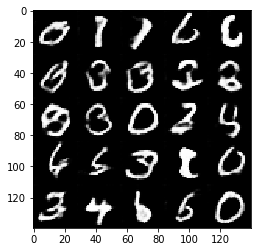


 In epoch 1/2 and step 1500 The discriminator Loss is 0.53866... The generator Loss is 2.49090

 In epoch 1/2 and step 1510 The discriminator Loss is 0.51085... The generator Loss is 2.63305

 In epoch 1/2 and step 1520 The discriminator Loss is 0.47534... The generator Loss is 3.71353

 In epoch 1/2 and step 1530 The discriminator Loss is 0.67918... The generator Loss is 1.45298

 In epoch 1/2 and step 1540 The discriminator Loss is 0.49862... The generator Loss is 3.45136

 In epoch 1/2 and step 1550 The discriminator Loss is 1.05620... The generator Loss is 1.18541

 In epoch 1/2 and step 1560 The discriminator Loss is 0.77365... The generator Loss is 1.41528

 In epoch 1/2 and step 1570 The discriminator Loss is 2.15529... The generator Loss is 0.44323

 In epoch 1/2 and step 1580 The discriminator Loss is 1.10442... The generator Loss is 0.89975

 In epoch 1/2 and step 1590 The discriminator Loss is 0.58602... The generator Loss is 2.64461


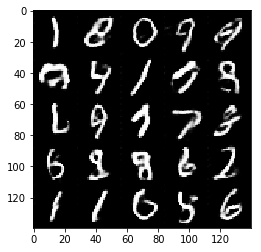


 In epoch 1/2 and step 1600 The discriminator Loss is 0.95288... The generator Loss is 3.26486

 In epoch 1/2 and step 1610 The discriminator Loss is 0.56800... The generator Loss is 3.30177

 In epoch 1/2 and step 1620 The discriminator Loss is 0.62395... The generator Loss is 3.22092

 In epoch 1/2 and step 1630 The discriminator Loss is 1.50894... The generator Loss is 4.81039

 In epoch 1/2 and step 1640 The discriminator Loss is 1.00011... The generator Loss is 1.03778

 In epoch 1/2 and step 1650 The discriminator Loss is 1.13033... The generator Loss is 4.34675

 In epoch 1/2 and step 1660 The discriminator Loss is 0.95096... The generator Loss is 3.49204

 In epoch 1/2 and step 1670 The discriminator Loss is 1.39145... The generator Loss is 0.98334

 In epoch 1/2 and step 1680 The discriminator Loss is 0.57026... The generator Loss is 2.15385

 In epoch 1/2 and step 1690 The discriminator Loss is 0.64056... The generator Loss is 1.49365


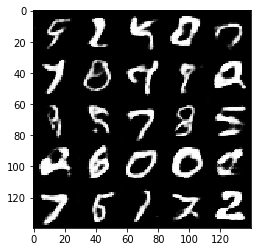


 In epoch 1/2 and step 1700 The discriminator Loss is 0.50887... The generator Loss is 3.24010

 In epoch 1/2 and step 1710 The discriminator Loss is 0.50476... The generator Loss is 3.25899

 In epoch 1/2 and step 1720 The discriminator Loss is 1.10293... The generator Loss is 0.85417

 In epoch 1/2 and step 1730 The discriminator Loss is 0.55477... The generator Loss is 2.38867

 In epoch 1/2 and step 1740 The discriminator Loss is 0.45580... The generator Loss is 3.43746

 In epoch 1/2 and step 1750 The discriminator Loss is 0.40999... The generator Loss is 4.52548

 In epoch 1/2 and step 1760 The discriminator Loss is 1.53477... The generator Loss is 0.93356

 In epoch 1/2 and step 1770 The discriminator Loss is 0.41303... The generator Loss is 3.76817

 In epoch 1/2 and step 1780 The discriminator Loss is 0.44763... The generator Loss is 3.15514

 In epoch 1/2 and step 1790 The discriminator Loss is 0.55539... The generator Loss is 4.57569


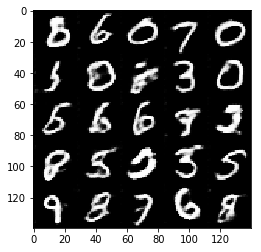


 In epoch 1/2 and step 1800 The discriminator Loss is 1.74935... The generator Loss is 0.52696

 In epoch 1/2 and step 1810 The discriminator Loss is 0.85672... The generator Loss is 1.49539

 In epoch 1/2 and step 1820 The discriminator Loss is 0.58767... The generator Loss is 2.58178

 In epoch 1/2 and step 1830 The discriminator Loss is 0.84933... The generator Loss is 1.48913

 In epoch 1/2 and step 1840 The discriminator Loss is 1.18370... The generator Loss is 1.21400

 In epoch 1/2 and step 1850 The discriminator Loss is 0.58558... The generator Loss is 2.11403

 In epoch 1/2 and step 1860 The discriminator Loss is 0.66032... The generator Loss is 4.04105

 In epoch 1/2 and step 1870 The discriminator Loss is 1.17285... The generator Loss is 0.98038

 In epoch 1/2... The discriminator Loss is 0.71856... The generator Loss: 2.96965

 In epoch 2/2 and step 1880 The discriminator Loss is 0.48532... The generator Loss is 2.68085

 In epoch 2/2 and step 1890 The discriminator Loss i

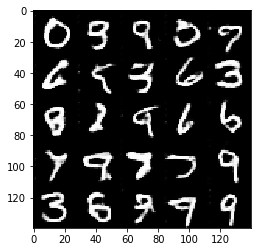


 In epoch 2/2 and step 1900 The discriminator Loss is 0.62422... The generator Loss is 2.41134

 In epoch 2/2 and step 1910 The discriminator Loss is 1.37626... The generator Loss is 1.31495

 In epoch 2/2 and step 1920 The discriminator Loss is 1.12162... The generator Loss is 1.40703

 In epoch 2/2 and step 1930 The discriminator Loss is 0.49181... The generator Loss is 2.06932

 In epoch 2/2 and step 1940 The discriminator Loss is 0.60414... The generator Loss is 1.55590

 In epoch 2/2 and step 1950 The discriminator Loss is 1.33086... The generator Loss is 0.75470

 In epoch 2/2 and step 1960 The discriminator Loss is 1.73029... The generator Loss is 0.45696

 In epoch 2/2 and step 1970 The discriminator Loss is 0.73211... The generator Loss is 1.73204

 In epoch 2/2 and step 1980 The discriminator Loss is 0.48406... The generator Loss is 2.82771

 In epoch 2/2 and step 1990 The discriminator Loss is 0.81548... The generator Loss is 4.25100


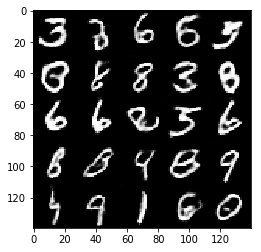


 In epoch 2/2 and step 2000 The discriminator Loss is 0.96262... The generator Loss is 1.54637

 In epoch 2/2 and step 2010 The discriminator Loss is 1.30810... The generator Loss is 1.10520

 In epoch 2/2 and step 2020 The discriminator Loss is 0.70798... The generator Loss is 1.96948

 In epoch 2/2 and step 2030 The discriminator Loss is 0.36259... The generator Loss is 2.85815

 In epoch 2/2 and step 2040 The discriminator Loss is 0.48669... The generator Loss is 1.96980

 In epoch 2/2 and step 2050 The discriminator Loss is 0.44860... The generator Loss is 1.97587

 In epoch 2/2 and step 2060 The discriminator Loss is 1.87893... The generator Loss is 0.23958

 In epoch 2/2 and step 2070 The discriminator Loss is 0.46722... The generator Loss is 2.74272

 In epoch 2/2 and step 2080 The discriminator Loss is 0.59577... The generator Loss is 2.78692

 In epoch 2/2 and step 2090 The discriminator Loss is 0.81250... The generator Loss is 0.90898


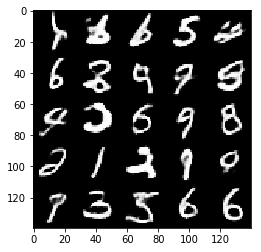


 In epoch 2/2 and step 2100 The discriminator Loss is 0.64622... The generator Loss is 1.60632

 In epoch 2/2 and step 2110 The discriminator Loss is 0.39855... The generator Loss is 3.87422

 In epoch 2/2 and step 2120 The discriminator Loss is 0.43880... The generator Loss is 2.48412

 In epoch 2/2 and step 2130 The discriminator Loss is 0.72249... The generator Loss is 4.75110

 In epoch 2/2 and step 2140 The discriminator Loss is 0.57471... The generator Loss is 2.73351

 In epoch 2/2 and step 2150 The discriminator Loss is 0.84071... The generator Loss is 2.03430

 In epoch 2/2 and step 2160 The discriminator Loss is 0.65663... The generator Loss is 1.93840

 In epoch 2/2 and step 2170 The discriminator Loss is 0.56550... The generator Loss is 2.13925

 In epoch 2/2 and step 2180 The discriminator Loss is 0.44109... The generator Loss is 2.81553

 In epoch 2/2 and step 2190 The discriminator Loss is 0.66906... The generator Loss is 0.88838


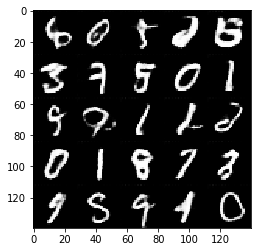


 In epoch 2/2 and step 2200 The discriminator Loss is 0.81855... The generator Loss is 4.93073

 In epoch 2/2 and step 2210 The discriminator Loss is 0.43283... The generator Loss is 3.29814

 In epoch 2/2 and step 2220 The discriminator Loss is 0.64892... The generator Loss is 3.85434

 In epoch 2/2 and step 2230 The discriminator Loss is 0.68974... The generator Loss is 5.24769

 In epoch 2/2 and step 2240 The discriminator Loss is 0.57516... The generator Loss is 2.20597

 In epoch 2/2 and step 2250 The discriminator Loss is 0.91527... The generator Loss is 2.14181

 In epoch 2/2 and step 2260 The discriminator Loss is 0.63235... The generator Loss is 2.25049

 In epoch 2/2 and step 2270 The discriminator Loss is 0.43751... The generator Loss is 3.46108

 In epoch 2/2 and step 2280 The discriminator Loss is 0.86320... The generator Loss is 4.72201

 In epoch 2/2 and step 2290 The discriminator Loss is 0.92673... The generator Loss is 1.16510


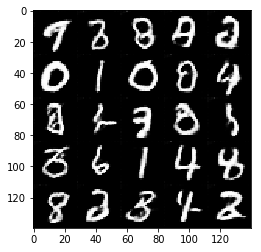


 In epoch 2/2 and step 2300 The discriminator Loss is 0.68017... The generator Loss is 3.52165

 In epoch 2/2 and step 2310 The discriminator Loss is 0.75506... The generator Loss is 1.95277

 In epoch 2/2 and step 2320 The discriminator Loss is 0.49308... The generator Loss is 3.06994

 In epoch 2/2 and step 2330 The discriminator Loss is 0.55088... The generator Loss is 2.62809

 In epoch 2/2 and step 2340 The discriminator Loss is 0.55767... The generator Loss is 2.55957

 In epoch 2/2 and step 2350 The discriminator Loss is 0.76822... The generator Loss is 1.49690

 In epoch 2/2 and step 2360 The discriminator Loss is 0.62938... The generator Loss is 2.18877

 In epoch 2/2 and step 2370 The discriminator Loss is 0.58110... The generator Loss is 2.47191

 In epoch 2/2 and step 2380 The discriminator Loss is 0.50152... The generator Loss is 3.63322

 In epoch 2/2 and step 2390 The discriminator Loss is 0.57878... The generator Loss is 2.03389


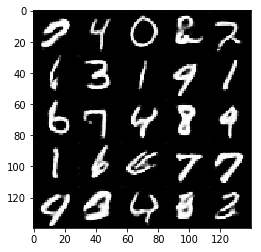


 In epoch 2/2 and step 2400 The discriminator Loss is 0.88750... The generator Loss is 1.25917

 In epoch 2/2 and step 2410 The discriminator Loss is 1.52116... The generator Loss is 0.71689

 In epoch 2/2 and step 2420 The discriminator Loss is 0.88853... The generator Loss is 1.77656

 In epoch 2/2 and step 2430 The discriminator Loss is 0.71174... The generator Loss is 1.44126

 In epoch 2/2 and step 2440 The discriminator Loss is 0.76022... The generator Loss is 1.83008

 In epoch 2/2 and step 2450 The discriminator Loss is 1.13275... The generator Loss is 1.04107

 In epoch 2/2 and step 2460 The discriminator Loss is 1.36804... The generator Loss is 0.68533

 In epoch 2/2 and step 2470 The discriminator Loss is 0.49199... The generator Loss is 2.29834

 In epoch 2/2 and step 2480 The discriminator Loss is 0.45992... The generator Loss is 3.82453

 In epoch 2/2 and step 2490 The discriminator Loss is 0.55487... The generator Loss is 2.74887


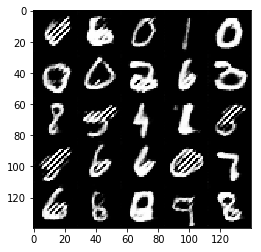


 In epoch 2/2 and step 2500 The discriminator Loss is 0.37788... The generator Loss is 4.52540

 In epoch 2/2 and step 2510 The discriminator Loss is 0.48030... The generator Loss is 1.67915

 In epoch 2/2 and step 2520 The discriminator Loss is 0.37062... The generator Loss is 3.48676

 In epoch 2/2 and step 2530 The discriminator Loss is 0.38973... The generator Loss is 4.39045

 In epoch 2/2 and step 2540 The discriminator Loss is 0.42395... The generator Loss is 2.67805

 In epoch 2/2 and step 2550 The discriminator Loss is 0.53434... The generator Loss is 2.12422

 In epoch 2/2 and step 2560 The discriminator Loss is 0.39788... The generator Loss is 4.04610

 In epoch 2/2 and step 2570 The discriminator Loss is 0.48329... The generator Loss is 3.17980

 In epoch 2/2 and step 2580 The discriminator Loss is 0.56271... The generator Loss is 1.94946

 In epoch 2/2 and step 2590 The discriminator Loss is 0.91894... The generator Loss is 0.87382


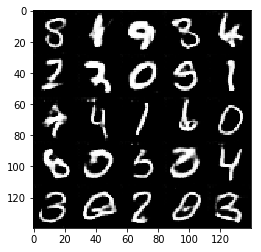


 In epoch 2/2 and step 2600 The discriminator Loss is 0.64382... The generator Loss is 2.81953

 In epoch 2/2 and step 2610 The discriminator Loss is 0.72185... The generator Loss is 1.90652

 In epoch 2/2 and step 2620 The discriminator Loss is 0.44660... The generator Loss is 2.15123

 In epoch 2/2 and step 2630 The discriminator Loss is 1.16974... The generator Loss is 0.77193

 In epoch 2/2 and step 2640 The discriminator Loss is 0.51473... The generator Loss is 2.55544

 In epoch 2/2 and step 2650 The discriminator Loss is 0.42656... The generator Loss is 2.98913

 In epoch 2/2 and step 2660 The discriminator Loss is 0.71157... The generator Loss is 4.01525

 In epoch 2/2 and step 2670 The discriminator Loss is 0.43626... The generator Loss is 3.04721

 In epoch 2/2 and step 2680 The discriminator Loss is 0.78580... The generator Loss is 1.54522

 In epoch 2/2 and step 2690 The discriminator Loss is 0.80510... The generator Loss is 5.12709


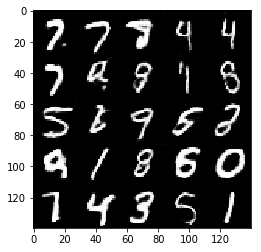


 In epoch 2/2 and step 2700 The discriminator Loss is 0.54711... The generator Loss is 2.31118

 In epoch 2/2 and step 2710 The discriminator Loss is 1.77730... The generator Loss is 0.51343

 In epoch 2/2 and step 2720 The discriminator Loss is 0.48689... The generator Loss is 2.71526

 In epoch 2/2 and step 2730 The discriminator Loss is 0.46011... The generator Loss is 2.89059

 In epoch 2/2 and step 2740 The discriminator Loss is 0.58750... The generator Loss is 2.04922

 In epoch 2/2 and step 2750 The discriminator Loss is 0.48146... The generator Loss is 2.52690

 In epoch 2/2 and step 2760 The discriminator Loss is 0.36483... The generator Loss is 3.99705

 In epoch 2/2 and step 2770 The discriminator Loss is 1.54101... The generator Loss is 0.53755

 In epoch 2/2 and step 2780 The discriminator Loss is 1.06317... The generator Loss is 0.89937

 In epoch 2/2 and step 2790 The discriminator Loss is 1.87363... The generator Loss is 0.38402


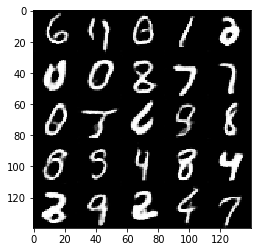


 In epoch 2/2 and step 2800 The discriminator Loss is 0.59631... The generator Loss is 1.62598

 In epoch 2/2 and step 2810 The discriminator Loss is 0.84439... The generator Loss is 2.08603

 In epoch 2/2 and step 2820 The discriminator Loss is 0.59129... The generator Loss is 1.82220

 In epoch 2/2 and step 2830 The discriminator Loss is 0.49447... The generator Loss is 2.21103

 In epoch 2/2 and step 2840 The discriminator Loss is 1.08440... The generator Loss is 0.98174

 In epoch 2/2 and step 2850 The discriminator Loss is 0.67607... The generator Loss is 1.36953

 In epoch 2/2 and step 2860 The discriminator Loss is 0.42348... The generator Loss is 3.13211

 In epoch 2/2 and step 2870 The discriminator Loss is 0.37467... The generator Loss is 4.36188

 In epoch 2/2 and step 2880 The discriminator Loss is 0.42731... The generator Loss is 5.17804

 In epoch 2/2 and step 2890 The discriminator Loss is 0.72028... The generator Loss is 1.75314


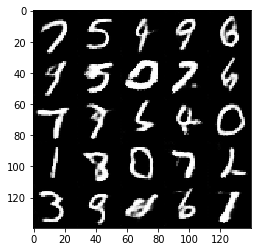


 In epoch 2/2 and step 2900 The discriminator Loss is 0.44908... The generator Loss is 3.50115

 In epoch 2/2 and step 2910 The discriminator Loss is 0.46627... The generator Loss is 3.15364

 In epoch 2/2 and step 2920 The discriminator Loss is 0.67371... The generator Loss is 1.57235

 In epoch 2/2 and step 2930 The discriminator Loss is 0.54438... The generator Loss is 3.21745

 In epoch 2/2 and step 2940 The discriminator Loss is 0.37433... The generator Loss is 3.52235

 In epoch 2/2 and step 2950 The discriminator Loss is 0.38647... The generator Loss is 2.58606

 In epoch 2/2 and step 2960 The discriminator Loss is 0.49317... The generator Loss is 2.63386

 In epoch 2/2 and step 2970 The discriminator Loss is 0.39782... The generator Loss is 3.96625

 In epoch 2/2 and step 2980 The discriminator Loss is 0.87246... The generator Loss is 0.92677

 In epoch 2/2 and step 2990 The discriminator Loss is 0.48909... The generator Loss is 3.08942


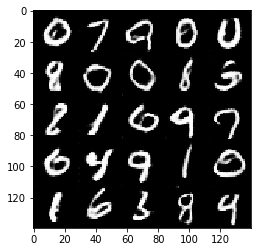


 In epoch 2/2 and step 3000 The discriminator Loss is 0.40773... The generator Loss is 3.84873

 In epoch 2/2 and step 3010 The discriminator Loss is 0.43482... The generator Loss is 2.03800

 In epoch 2/2 and step 3020 The discriminator Loss is 0.45784... The generator Loss is 3.48801

 In epoch 2/2 and step 3030 The discriminator Loss is 0.66319... The generator Loss is 2.36790

 In epoch 2/2 and step 3040 The discriminator Loss is 0.37468... The generator Loss is 3.03883

 In epoch 2/2 and step 3050 The discriminator Loss is 0.45768... The generator Loss is 3.43769

 In epoch 2/2 and step 3060 The discriminator Loss is 0.55805... The generator Loss is 2.05845

 In epoch 2/2 and step 3070 The discriminator Loss is 0.53571... The generator Loss is 4.64876

 In epoch 2/2 and step 3080 The discriminator Loss is 0.85696... The generator Loss is 3.17044

 In epoch 2/2 and step 3090 The discriminator Loss is 0.41537... The generator Loss is 3.23174


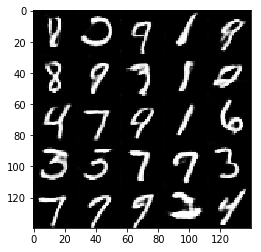


 In epoch 2/2 and step 3100 The discriminator Loss is 0.49792... The generator Loss is 3.43216

 In epoch 2/2 and step 3110 The discriminator Loss is 0.48124... The generator Loss is 1.74308

 In epoch 2/2 and step 3120 The discriminator Loss is 1.02405... The generator Loss is 1.72506

 In epoch 2/2 and step 3130 The discriminator Loss is 0.63913... The generator Loss is 2.95069

 In epoch 2/2 and step 3140 The discriminator Loss is 1.16588... The generator Loss is 0.70042

 In epoch 2/2 and step 3150 The discriminator Loss is 0.45527... The generator Loss is 2.53736

 In epoch 2/2 and step 3160 The discriminator Loss is 0.40612... The generator Loss is 4.30666

 In epoch 2/2 and step 3170 The discriminator Loss is 0.40031... The generator Loss is 4.10559

 In epoch 2/2 and step 3180 The discriminator Loss is 0.37907... The generator Loss is 4.42662

 In epoch 2/2 and step 3190 The discriminator Loss is 0.53438... The generator Loss is 2.68305


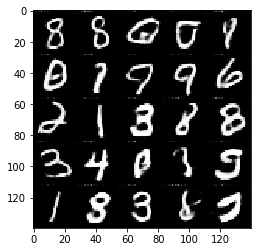


 In epoch 2/2 and step 3200 The discriminator Loss is 0.38230... The generator Loss is 3.72013

 In epoch 2/2 and step 3210 The discriminator Loss is 0.35587... The generator Loss is 6.68211

 In epoch 2/2 and step 3220 The discriminator Loss is 0.36478... The generator Loss is 4.24271

 In epoch 2/2 and step 3230 The discriminator Loss is 0.34866... The generator Loss is 4.46675

 In epoch 2/2 and step 3240 The discriminator Loss is 1.52586... The generator Loss is 0.51215

 In epoch 2/2 and step 3250 The discriminator Loss is 0.98353... The generator Loss is 3.52280

 In epoch 2/2 and step 3260 The discriminator Loss is 0.48853... The generator Loss is 2.41810

 In epoch 2/2 and step 3270 The discriminator Loss is 0.51808... The generator Loss is 3.11499

 In epoch 2/2 and step 3280 The discriminator Loss is 0.79481... The generator Loss is 1.61951

 In epoch 2/2 and step 3290 The discriminator Loss is 0.72056... The generator Loss is 4.87468


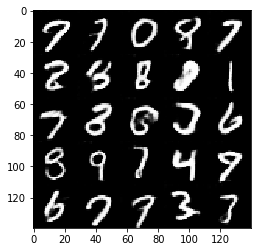


 In epoch 2/2 and step 3300 The discriminator Loss is 0.43496... The generator Loss is 2.08030

 In epoch 2/2 and step 3310 The discriminator Loss is 0.94482... The generator Loss is 6.28520

 In epoch 2/2 and step 3320 The discriminator Loss is 0.41054... The generator Loss is 3.74216

 In epoch 2/2 and step 3330 The discriminator Loss is 0.47200... The generator Loss is 3.35358

 In epoch 2/2 and step 3340 The discriminator Loss is 0.60960... The generator Loss is 2.19071

 In epoch 2/2 and step 3350 The discriminator Loss is 0.54881... The generator Loss is 2.44834

 In epoch 2/2 and step 3360 The discriminator Loss is 0.35893... The generator Loss is 3.41268

 In epoch 2/2 and step 3370 The discriminator Loss is 0.50331... The generator Loss is 1.99739

 In epoch 2/2 and step 3380 The discriminator Loss is 0.46911... The generator Loss is 3.33196

 In epoch 2/2 and step 3390 The discriminator Loss is 1.12683... The generator Loss is 3.92561


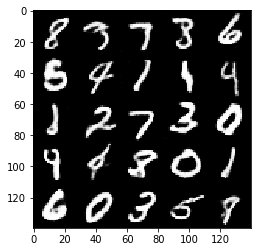


 In epoch 2/2 and step 3400 The discriminator Loss is 0.49547... The generator Loss is 2.66869

 In epoch 2/2 and step 3410 The discriminator Loss is 1.38022... The generator Loss is 1.11857

 In epoch 2/2 and step 3420 The discriminator Loss is 0.42473... The generator Loss is 2.86520

 In epoch 2/2 and step 3430 The discriminator Loss is 0.55787... The generator Loss is 3.95365

 In epoch 2/2 and step 3440 The discriminator Loss is 0.44297... The generator Loss is 3.23487

 In epoch 2/2 and step 3450 The discriminator Loss is 0.47986... The generator Loss is 3.19915

 In epoch 2/2 and step 3460 The discriminator Loss is 0.37287... The generator Loss is 4.24732

 In epoch 2/2 and step 3470 The discriminator Loss is 0.36881... The generator Loss is 3.93257

 In epoch 2/2 and step 3480 The discriminator Loss is 0.41225... The generator Loss is 4.07928

 In epoch 2/2 and step 3490 The discriminator Loss is 0.50470... The generator Loss is 2.47730


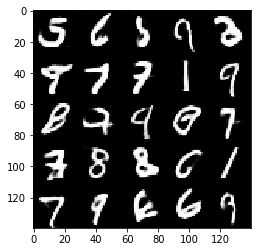


 In epoch 2/2 and step 3500 The discriminator Loss is 0.72713... The generator Loss is 3.04887

 In epoch 2/2 and step 3510 The discriminator Loss is 0.40196... The generator Loss is 3.43057

 In epoch 2/2 and step 3520 The discriminator Loss is 0.56850... The generator Loss is 1.90481

 In epoch 2/2 and step 3530 The discriminator Loss is 0.42133... The generator Loss is 4.99950

 In epoch 2/2 and step 3540 The discriminator Loss is 0.53162... The generator Loss is 2.22432

 In epoch 2/2 and step 3550 The discriminator Loss is 0.85358... The generator Loss is 1.99030

 In epoch 2/2 and step 3560 The discriminator Loss is 0.42220... The generator Loss is 3.16882

 In epoch 2/2 and step 3570 The discriminator Loss is 0.44825... The generator Loss is 2.63536

 In epoch 2/2 and step 3580 The discriminator Loss is 0.52010... The generator Loss is 2.07120

 In epoch 2/2 and step 3590 The discriminator Loss is 0.63672... The generator Loss is 4.76902


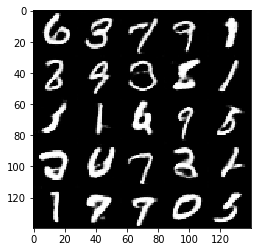


 In epoch 2/2 and step 3600 The discriminator Loss is 0.57122... The generator Loss is 2.27627

 In epoch 2/2 and step 3610 The discriminator Loss is 0.41436... The generator Loss is 3.88308

 In epoch 2/2 and step 3620 The discriminator Loss is 0.42959... The generator Loss is 3.60466

 In epoch 2/2 and step 3630 The discriminator Loss is 0.42004... The generator Loss is 3.73015

 In epoch 2/2 and step 3640 The discriminator Loss is 0.36951... The generator Loss is 4.12747

 In epoch 2/2 and step 3650 The discriminator Loss is 0.43378... The generator Loss is 3.65951

 In epoch 2/2 and step 3660 The discriminator Loss is 0.36919... The generator Loss is 4.14110

 In epoch 2/2 and step 3670 The discriminator Loss is 0.42405... The generator Loss is 3.11627

 In epoch 2/2 and step 3680 The discriminator Loss is 0.49163... The generator Loss is 2.73439

 In epoch 2/2 and step 3690 The discriminator Loss is 0.39072... The generator Loss is 4.12893


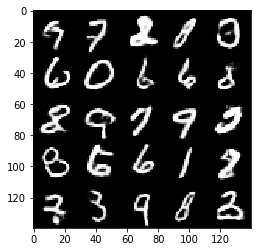


 In epoch 2/2 and step 3700 The discriminator Loss is 0.68552... The generator Loss is 2.51219

 In epoch 2/2 and step 3710 The discriminator Loss is 1.07077... The generator Loss is 1.53376

 In epoch 2/2 and step 3720 The discriminator Loss is 0.50213... The generator Loss is 2.47725

 In epoch 2/2 and step 3730 The discriminator Loss is 0.41450... The generator Loss is 2.92048

 In epoch 2/2 and step 3740 The discriminator Loss is 0.41307... The generator Loss is 2.76058

 In epoch 2/2 and step 3750 The discriminator Loss is 0.40889... The generator Loss is 4.79773

 In epoch 2/2... The discriminator Loss is 0.38145... The generator Loss: 5.62437


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.01
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.


 In epoch 1/1 and step 10 The discriminator Loss is 3.87895... The generator Loss is 0.42048

 In epoch 1/1 and step 20 The discriminator Loss is 4.17288... The generator Loss is 0.23573

 In epoch 1/1 and step 30 The discriminator Loss is 1.84688... The generator Loss is 2.44508

 In epoch 1/1 and step 40 The discriminator Loss is 2.83222... The generator Loss is 0.33786

 In epoch 1/1 and step 50 The discriminator Loss is 1.85050... The generator Loss is 0.57972

 In epoch 1/1 and step 60 The discriminator Loss is 2.89970... The generator Loss is 0.53696

 In epoch 1/1 and step 70 The discriminator Loss is 1.43562... The generator Loss is 0.55949

 In epoch 1/1 and step 80 The discriminator Loss is 1.38098... The generator Loss is 0.61505

 In epoch 1/1 and step 90 The discriminator Loss is 0.79295... The generator Loss is 1.17550


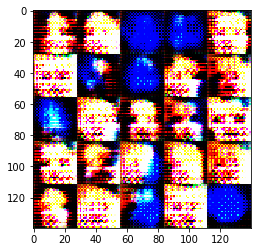


 In epoch 1/1 and step 100 The discriminator Loss is 0.78215... The generator Loss is 1.36290

 In epoch 1/1 and step 110 The discriminator Loss is 0.69020... The generator Loss is 1.78388

 In epoch 1/1 and step 120 The discriminator Loss is 0.60405... The generator Loss is 1.69425

 In epoch 1/1 and step 130 The discriminator Loss is 0.42185... The generator Loss is 2.74661

 In epoch 1/1 and step 140 The discriminator Loss is 2.15863... The generator Loss is 1.18271

 In epoch 1/1 and step 150 The discriminator Loss is 0.79825... The generator Loss is 1.81519

 In epoch 1/1 and step 160 The discriminator Loss is 0.49929... The generator Loss is 2.73745

 In epoch 1/1 and step 170 The discriminator Loss is 0.51831... The generator Loss is 2.83727

 In epoch 1/1 and step 180 The discriminator Loss is 0.55203... The generator Loss is 2.07650

 In epoch 1/1 and step 190 The discriminator Loss is 0.35650... The generator Loss is 4.23661


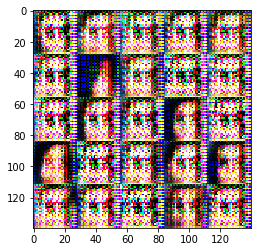


 In epoch 1/1 and step 200 The discriminator Loss is 0.34501... The generator Loss is 4.96737

 In epoch 1/1 and step 210 The discriminator Loss is 2.60996... The generator Loss is 0.19681

 In epoch 1/1 and step 220 The discriminator Loss is 2.74329... The generator Loss is 4.54449

 In epoch 1/1 and step 230 The discriminator Loss is 1.15516... The generator Loss is 1.11083

 In epoch 1/1 and step 240 The discriminator Loss is 1.60252... The generator Loss is 4.84347

 In epoch 1/1 and step 250 The discriminator Loss is 0.90542... The generator Loss is 1.46105

 In epoch 1/1 and step 260 The discriminator Loss is 0.65017... The generator Loss is 1.54816

 In epoch 1/1 and step 270 The discriminator Loss is 0.55005... The generator Loss is 2.63590

 In epoch 1/1 and step 280 The discriminator Loss is 0.48699... The generator Loss is 2.25805

 In epoch 1/1 and step 290 The discriminator Loss is 0.63164... The generator Loss is 1.83200


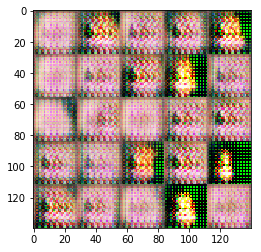


 In epoch 1/1 and step 300 The discriminator Loss is 4.10559... The generator Loss is 8.05432

 In epoch 1/1 and step 310 The discriminator Loss is 1.23075... The generator Loss is 1.25732

 In epoch 1/1 and step 320 The discriminator Loss is 0.81016... The generator Loss is 1.38058

 In epoch 1/1 and step 330 The discriminator Loss is 1.48975... The generator Loss is 0.74803

 In epoch 1/1 and step 340 The discriminator Loss is 0.93640... The generator Loss is 1.12330

 In epoch 1/1 and step 350 The discriminator Loss is 1.77265... The generator Loss is 0.53012

 In epoch 1/1 and step 360 The discriminator Loss is 1.54348... The generator Loss is 0.60597

 In epoch 1/1 and step 370 The discriminator Loss is 1.54276... The generator Loss is 0.62301

 In epoch 1/1 and step 380 The discriminator Loss is 1.46880... The generator Loss is 0.64218

 In epoch 1/1 and step 390 The discriminator Loss is 1.43306... The generator Loss is 0.74758


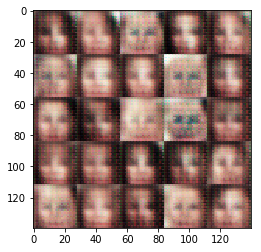


 In epoch 1/1 and step 400 The discriminator Loss is 1.36568... The generator Loss is 0.87489

 In epoch 1/1 and step 410 The discriminator Loss is 1.47364... The generator Loss is 1.02389

 In epoch 1/1 and step 420 The discriminator Loss is 1.41720... The generator Loss is 0.55504

 In epoch 1/1 and step 430 The discriminator Loss is 1.42838... The generator Loss is 0.77449

 In epoch 1/1 and step 440 The discriminator Loss is 1.36404... The generator Loss is 0.78172

 In epoch 1/1 and step 450 The discriminator Loss is 1.23530... The generator Loss is 0.86974

 In epoch 1/1 and step 460 The discriminator Loss is 1.40993... The generator Loss is 0.91641

 In epoch 1/1 and step 470 The discriminator Loss is 1.28213... The generator Loss is 0.80065

 In epoch 1/1 and step 480 The discriminator Loss is 1.39529... The generator Loss is 0.87911

 In epoch 1/1 and step 490 The discriminator Loss is 1.30529... The generator Loss is 0.96172


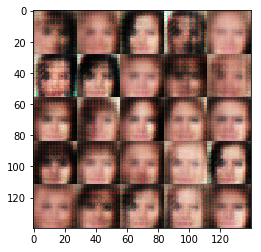


 In epoch 1/1 and step 500 The discriminator Loss is 1.22385... The generator Loss is 0.80590

 In epoch 1/1 and step 510 The discriminator Loss is 1.21880... The generator Loss is 0.97066

 In epoch 1/1 and step 520 The discriminator Loss is 1.29074... The generator Loss is 0.86819

 In epoch 1/1 and step 530 The discriminator Loss is 1.36399... The generator Loss is 0.88190

 In epoch 1/1 and step 540 The discriminator Loss is 1.53624... The generator Loss is 0.69893

 In epoch 1/1 and step 550 The discriminator Loss is 1.38297... The generator Loss is 0.78216

 In epoch 1/1 and step 560 The discriminator Loss is 1.26781... The generator Loss is 0.81076

 In epoch 1/1 and step 570 The discriminator Loss is 1.42504... The generator Loss is 0.84685

 In epoch 1/1 and step 580 The discriminator Loss is 1.36999... The generator Loss is 0.80753

 In epoch 1/1 and step 590 The discriminator Loss is 1.40278... The generator Loss is 0.77094


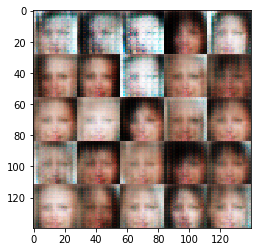


 In epoch 1/1 and step 600 The discriminator Loss is 1.34405... The generator Loss is 0.84176

 In epoch 1/1 and step 610 The discriminator Loss is 1.41192... The generator Loss is 0.68903

 In epoch 1/1 and step 620 The discriminator Loss is 1.33208... The generator Loss is 0.89174

 In epoch 1/1 and step 630 The discriminator Loss is 1.25581... The generator Loss is 0.93496

 In epoch 1/1 and step 640 The discriminator Loss is 1.19886... The generator Loss is 1.00459

 In epoch 1/1 and step 650 The discriminator Loss is 1.34760... The generator Loss is 0.80809

 In epoch 1/1 and step 660 The discriminator Loss is 1.39448... The generator Loss is 0.72936

 In epoch 1/1 and step 670 The discriminator Loss is 1.20242... The generator Loss is 1.22286

 In epoch 1/1 and step 680 The discriminator Loss is 1.29815... The generator Loss is 0.85025

 In epoch 1/1 and step 690 The discriminator Loss is 1.35456... The generator Loss is 0.92022


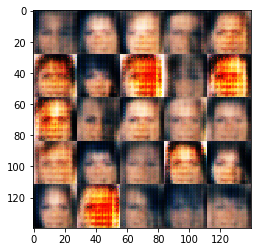


 In epoch 1/1 and step 700 The discriminator Loss is 1.43038... The generator Loss is 0.76059

 In epoch 1/1 and step 710 The discriminator Loss is 1.41669... The generator Loss is 0.66889

 In epoch 1/1 and step 720 The discriminator Loss is 1.41462... The generator Loss is 0.67759

 In epoch 1/1 and step 730 The discriminator Loss is 1.34408... The generator Loss is 0.79455

 In epoch 1/1 and step 740 The discriminator Loss is 1.36703... The generator Loss is 0.75173

 In epoch 1/1 and step 750 The discriminator Loss is 1.29117... The generator Loss is 0.84887

 In epoch 1/1 and step 760 The discriminator Loss is 1.25006... The generator Loss is 1.00842

 In epoch 1/1 and step 770 The discriminator Loss is 1.47900... The generator Loss is 0.74609

 In epoch 1/1 and step 780 The discriminator Loss is 1.44298... The generator Loss is 0.82871

 In epoch 1/1 and step 790 The discriminator Loss is 1.34483... The generator Loss is 0.72186


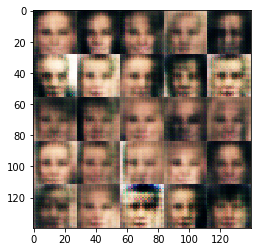


 In epoch 1/1 and step 800 The discriminator Loss is 1.39734... The generator Loss is 0.80868

 In epoch 1/1 and step 810 The discriminator Loss is 1.36513... The generator Loss is 0.67365

 In epoch 1/1 and step 820 The discriminator Loss is 1.33658... The generator Loss is 0.82847

 In epoch 1/1 and step 830 The discriminator Loss is 1.35082... The generator Loss is 0.77547

 In epoch 1/1 and step 840 The discriminator Loss is 1.35100... The generator Loss is 0.78534

 In epoch 1/1 and step 850 The discriminator Loss is 1.37041... The generator Loss is 0.86137

 In epoch 1/1 and step 860 The discriminator Loss is 1.38629... The generator Loss is 0.85517

 In epoch 1/1 and step 870 The discriminator Loss is 1.31990... The generator Loss is 0.82691

 In epoch 1/1 and step 880 The discriminator Loss is 1.38599... The generator Loss is 0.67208

 In epoch 1/1 and step 890 The discriminator Loss is 1.37268... The generator Loss is 0.84562


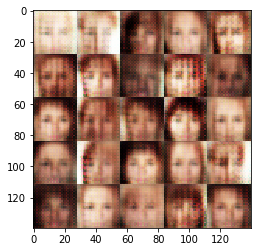


 In epoch 1/1 and step 900 The discriminator Loss is 1.31086... The generator Loss is 0.75770

 In epoch 1/1 and step 910 The discriminator Loss is 1.48097... The generator Loss is 0.69845

 In epoch 1/1 and step 920 The discriminator Loss is 1.30757... The generator Loss is 0.70726

 In epoch 1/1 and step 930 The discriminator Loss is 1.42697... The generator Loss is 0.84231

 In epoch 1/1 and step 940 The discriminator Loss is 1.26340... The generator Loss is 0.96515

 In epoch 1/1 and step 950 The discriminator Loss is 1.32753... The generator Loss is 0.95902

 In epoch 1/1 and step 960 The discriminator Loss is 1.50377... The generator Loss is 0.50862

 In epoch 1/1 and step 970 The discriminator Loss is 1.20817... The generator Loss is 1.21959

 In epoch 1/1 and step 980 The discriminator Loss is 0.68865... The generator Loss is 1.55476

 In epoch 1/1 and step 990 The discriminator Loss is 0.48682... The generator Loss is 2.26374


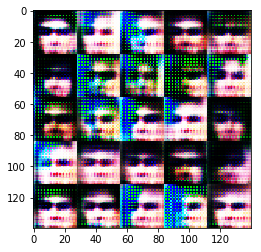


 In epoch 1/1 and step 1000 The discriminator Loss is 0.39233... The generator Loss is 3.59091

 In epoch 1/1 and step 1010 The discriminator Loss is 0.41316... The generator Loss is 4.52536

 In epoch 1/1 and step 1020 The discriminator Loss is 0.34276... The generator Loss is 6.80485

 In epoch 1/1 and step 1030 The discriminator Loss is 0.33901... The generator Loss is 5.82624

 In epoch 1/1 and step 1040 The discriminator Loss is 0.33948... The generator Loss is 5.55058

 In epoch 1/1 and step 1050 The discriminator Loss is 0.33631... The generator Loss is 5.21947

 In epoch 1/1 and step 1060 The discriminator Loss is 0.33863... The generator Loss is 4.99778

 In epoch 1/1 and step 1070 The discriminator Loss is 0.33756... The generator Loss is 5.69948

 In epoch 1/1 and step 1080 The discriminator Loss is 0.33459... The generator Loss is 7.88103

 In epoch 1/1 and step 1090 The discriminator Loss is 0.35574... The generator Loss is 3.90013


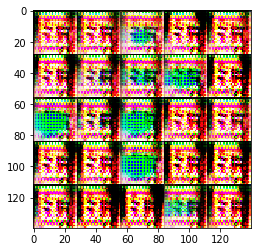


 In epoch 1/1 and step 1100 The discriminator Loss is 0.33343... The generator Loss is 5.59303

 In epoch 1/1 and step 1110 The discriminator Loss is 0.33114... The generator Loss is 7.00418

 In epoch 1/1 and step 1120 The discriminator Loss is 0.34792... The generator Loss is 4.12435

 In epoch 1/1 and step 1130 The discriminator Loss is 0.32963... The generator Loss is 7.15790

 In epoch 1/1 and step 1140 The discriminator Loss is 0.33146... The generator Loss is 6.52646

 In epoch 1/1 and step 1150 The discriminator Loss is 0.33195... The generator Loss is 5.67448

 In epoch 1/1 and step 1160 The discriminator Loss is 0.33191... The generator Loss is 5.97595

 In epoch 1/1 and step 1170 The discriminator Loss is 0.33452... The generator Loss is 5.28887

 In epoch 1/1 and step 1180 The discriminator Loss is 0.33628... The generator Loss is 6.85897

 In epoch 1/1 and step 1190 The discriminator Loss is 0.33272... The generator Loss is 6.06627


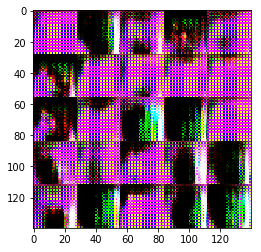


 In epoch 1/1 and step 1200 The discriminator Loss is 0.32840... The generator Loss is 14.41838

 In epoch 1/1 and step 1210 The discriminator Loss is 0.32665... The generator Loss is 8.36227

 In epoch 1/1 and step 1220 The discriminator Loss is 0.32869... The generator Loss is 7.73255

 In epoch 1/1 and step 1230 The discriminator Loss is 0.32691... The generator Loss is 8.00976

 In epoch 1/1 and step 1240 The discriminator Loss is 0.32692... The generator Loss is 8.03662

 In epoch 1/1 and step 1250 The discriminator Loss is 0.32917... The generator Loss is 8.45999

 In epoch 1/1 and step 1260 The discriminator Loss is 0.32725... The generator Loss is 7.81419

 In epoch 1/1 and step 1270 The discriminator Loss is 0.32665... The generator Loss is 8.25678

 In epoch 1/1 and step 1280 The discriminator Loss is 0.32752... The generator Loss is 6.96630

 In epoch 1/1 and step 1290 The discriminator Loss is 0.32688... The generator Loss is 8.01009


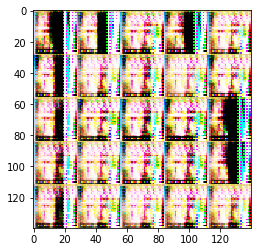


 In epoch 1/1 and step 1300 The discriminator Loss is 0.32760... The generator Loss is 7.22354

 In epoch 1/1 and step 1310 The discriminator Loss is 0.32681... The generator Loss is 10.57037

 In epoch 1/1 and step 1320 The discriminator Loss is 0.32876... The generator Loss is 9.64053

 In epoch 1/1 and step 1330 The discriminator Loss is 0.85320... The generator Loss is 1.42648

 In epoch 1/1 and step 1340 The discriminator Loss is 0.65979... The generator Loss is 1.75630

 In epoch 1/1 and step 1350 The discriminator Loss is 0.80130... The generator Loss is 1.33378

 In epoch 1/1 and step 1360 The discriminator Loss is 1.16996... The generator Loss is 0.82754

 In epoch 1/1 and step 1370 The discriminator Loss is 1.78335... The generator Loss is 0.38735

 In epoch 1/1 and step 1380 The discriminator Loss is 0.81535... The generator Loss is 2.02210

 In epoch 1/1 and step 1390 The discriminator Loss is 0.86252... The generator Loss is 1.59245


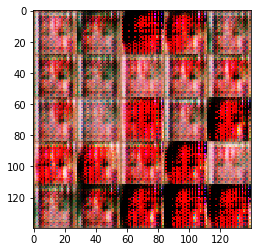


 In epoch 1/1 and step 1400 The discriminator Loss is 2.20647... The generator Loss is 3.79786

 In epoch 1/1 and step 1410 The discriminator Loss is 0.95160... The generator Loss is 1.21838

 In epoch 1/1 and step 1420 The discriminator Loss is 1.36071... The generator Loss is 1.78525

 In epoch 1/1 and step 1430 The discriminator Loss is 1.16132... The generator Loss is 0.65165

 In epoch 1/1 and step 1440 The discriminator Loss is 1.20726... The generator Loss is 0.79818

 In epoch 1/1 and step 1450 The discriminator Loss is 1.31081... The generator Loss is 0.60984

 In epoch 1/1 and step 1460 The discriminator Loss is 1.41824... The generator Loss is 0.72167

 In epoch 1/1 and step 1470 The discriminator Loss is 1.44968... The generator Loss is 0.73040

 In epoch 1/1 and step 1480 The discriminator Loss is 1.09701... The generator Loss is 0.78754

 In epoch 1/1 and step 1490 The discriminator Loss is 1.53126... The generator Loss is 0.71803


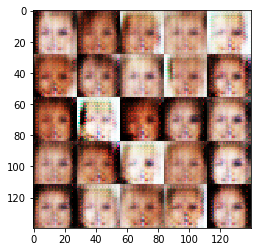


 In epoch 1/1 and step 1500 The discriminator Loss is 1.33648... The generator Loss is 0.73244

 In epoch 1/1 and step 1510 The discriminator Loss is 1.56642... The generator Loss is 0.53527

 In epoch 1/1 and step 1520 The discriminator Loss is 1.41199... The generator Loss is 0.81068

 In epoch 1/1 and step 1530 The discriminator Loss is 1.34830... The generator Loss is 0.70632

 In epoch 1/1 and step 1540 The discriminator Loss is 1.25896... The generator Loss is 0.87501

 In epoch 1/1 and step 1550 The discriminator Loss is 1.35144... The generator Loss is 0.84469

 In epoch 1/1 and step 1560 The discriminator Loss is 1.51184... The generator Loss is 0.84579

 In epoch 1/1 and step 1570 The discriminator Loss is 1.26299... The generator Loss is 0.66596

 In epoch 1/1 and step 1580 The discriminator Loss is 1.22812... The generator Loss is 1.12544

 In epoch 1/1 and step 1590 The discriminator Loss is 1.23465... The generator Loss is 1.10747


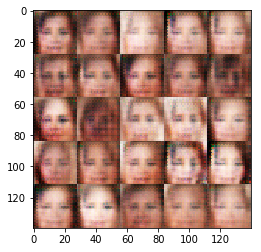


 In epoch 1/1 and step 1600 The discriminator Loss is 1.32332... The generator Loss is 0.65816

 In epoch 1/1 and step 1610 The discriminator Loss is 1.35308... The generator Loss is 0.96969

 In epoch 1/1 and step 1620 The discriminator Loss is 1.35712... The generator Loss is 0.74391

 In epoch 1/1 and step 1630 The discriminator Loss is 1.43228... The generator Loss is 0.68644

 In epoch 1/1 and step 1640 The discriminator Loss is 1.24705... The generator Loss is 0.68533

 In epoch 1/1 and step 1650 The discriminator Loss is 1.31019... The generator Loss is 0.93739

 In epoch 1/1 and step 1660 The discriminator Loss is 1.23760... The generator Loss is 0.86698

 In epoch 1/1 and step 1670 The discriminator Loss is 1.32042... The generator Loss is 0.89846

 In epoch 1/1 and step 1680 The discriminator Loss is 1.28824... The generator Loss is 1.13429

 In epoch 1/1 and step 1690 The discriminator Loss is 1.26225... The generator Loss is 0.76670


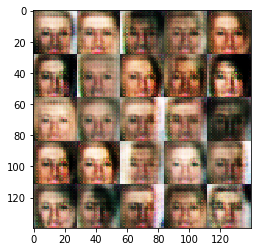


 In epoch 1/1 and step 1700 The discriminator Loss is 1.28074... The generator Loss is 0.99161

 In epoch 1/1 and step 1710 The discriminator Loss is 1.21123... The generator Loss is 0.94553

 In epoch 1/1 and step 1720 The discriminator Loss is 1.19327... The generator Loss is 0.78140

 In epoch 1/1 and step 1730 The discriminator Loss is 1.22480... The generator Loss is 0.64648

 In epoch 1/1 and step 1740 The discriminator Loss is 1.28749... The generator Loss is 0.83467

 In epoch 1/1 and step 1750 The discriminator Loss is 1.25446... The generator Loss is 1.27535

 In epoch 1/1 and step 1760 The discriminator Loss is 1.32142... The generator Loss is 0.71859

 In epoch 1/1 and step 1770 The discriminator Loss is 1.46940... The generator Loss is 0.68926

 In epoch 1/1 and step 1780 The discriminator Loss is 1.55031... The generator Loss is 0.62652

 In epoch 1/1 and step 1790 The discriminator Loss is 1.28624... The generator Loss is 0.97156


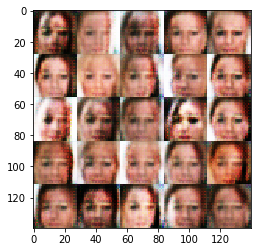


 In epoch 1/1 and step 1800 The discriminator Loss is 1.29966... The generator Loss is 0.72833

 In epoch 1/1 and step 1810 The discriminator Loss is 1.19960... The generator Loss is 0.85676

 In epoch 1/1 and step 1820 The discriminator Loss is 1.27197... The generator Loss is 0.83548

 In epoch 1/1 and step 1830 The discriminator Loss is 1.44278... The generator Loss is 0.84296

 In epoch 1/1 and step 1840 The discriminator Loss is 1.26446... The generator Loss is 0.79237

 In epoch 1/1 and step 1850 The discriminator Loss is 1.33541... The generator Loss is 0.89322

 In epoch 1/1 and step 1860 The discriminator Loss is 1.35668... The generator Loss is 0.92645

 In epoch 1/1 and step 1870 The discriminator Loss is 1.41726... The generator Loss is 0.70060

 In epoch 1/1 and step 1880 The discriminator Loss is 1.22947... The generator Loss is 0.81272

 In epoch 1/1 and step 1890 The discriminator Loss is 1.21300... The generator Loss is 0.97249


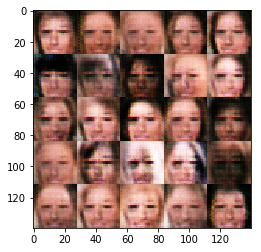


 In epoch 1/1 and step 1900 The discriminator Loss is 1.30946... The generator Loss is 1.16760

 In epoch 1/1 and step 1910 The discriminator Loss is 1.31359... The generator Loss is 0.74893

 In epoch 1/1 and step 1920 The discriminator Loss is 1.41291... The generator Loss is 0.59896

 In epoch 1/1 and step 1930 The discriminator Loss is 1.30596... The generator Loss is 0.64797

 In epoch 1/1 and step 1940 The discriminator Loss is 1.25347... The generator Loss is 0.87090

 In epoch 1/1 and step 1950 The discriminator Loss is 1.27518... The generator Loss is 0.69890

 In epoch 1/1 and step 1960 The discriminator Loss is 1.54573... The generator Loss is 0.63901

 In epoch 1/1 and step 1970 The discriminator Loss is 1.29493... The generator Loss is 0.77597

 In epoch 1/1 and step 1980 The discriminator Loss is 1.20011... The generator Loss is 0.87349

 In epoch 1/1 and step 1990 The discriminator Loss is 1.50173... The generator Loss is 0.48496


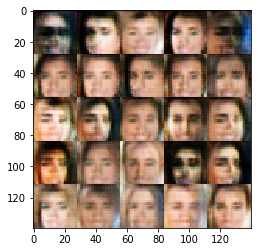


 In epoch 1/1 and step 2000 The discriminator Loss is 1.16332... The generator Loss is 0.85708

 In epoch 1/1 and step 2010 The discriminator Loss is 1.48528... The generator Loss is 0.70878

 In epoch 1/1 and step 2020 The discriminator Loss is 1.33049... The generator Loss is 0.55226

 In epoch 1/1 and step 2030 The discriminator Loss is 1.30888... The generator Loss is 0.93574

 In epoch 1/1 and step 2040 The discriminator Loss is 1.29854... The generator Loss is 0.95605

 In epoch 1/1 and step 2050 The discriminator Loss is 1.40661... The generator Loss is 0.68072

 In epoch 1/1 and step 2060 The discriminator Loss is 1.33375... The generator Loss is 0.86815

 In epoch 1/1 and step 2070 The discriminator Loss is 1.33305... The generator Loss is 0.76734

 In epoch 1/1 and step 2080 The discriminator Loss is 1.18507... The generator Loss is 0.80350

 In epoch 1/1 and step 2090 The discriminator Loss is 1.29494... The generator Loss is 0.81499


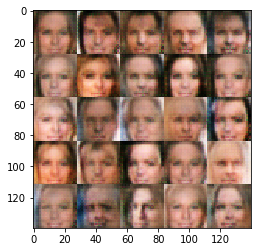


 In epoch 1/1 and step 2100 The discriminator Loss is 1.22599... The generator Loss is 1.11967

 In epoch 1/1 and step 2110 The discriminator Loss is 1.24182... The generator Loss is 0.87349

 In epoch 1/1 and step 2120 The discriminator Loss is 1.23858... The generator Loss is 0.72477

 In epoch 1/1 and step 2130 The discriminator Loss is 1.42613... The generator Loss is 0.59705

 In epoch 1/1 and step 2140 The discriminator Loss is 1.14769... The generator Loss is 0.87485

 In epoch 1/1 and step 2150 The discriminator Loss is 1.30443... The generator Loss is 0.68740

 In epoch 1/1 and step 2160 The discriminator Loss is 1.24435... The generator Loss is 0.88673

 In epoch 1/1 and step 2170 The discriminator Loss is 1.26789... The generator Loss is 0.68110

 In epoch 1/1 and step 2180 The discriminator Loss is 1.57655... The generator Loss is 0.45872

 In epoch 1/1 and step 2190 The discriminator Loss is 1.16340... The generator Loss is 0.89463


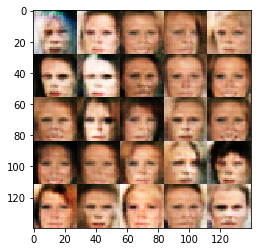


 In epoch 1/1 and step 2200 The discriminator Loss is 1.26937... The generator Loss is 1.13763

 In epoch 1/1 and step 2210 The discriminator Loss is 1.25100... The generator Loss is 0.78061

 In epoch 1/1 and step 2220 The discriminator Loss is 1.40815... The generator Loss is 0.50608

 In epoch 1/1 and step 2230 The discriminator Loss is 1.29133... The generator Loss is 0.66797

 In epoch 1/1 and step 2240 The discriminator Loss is 1.29549... The generator Loss is 0.88396

 In epoch 1/1 and step 2250 The discriminator Loss is 1.22052... The generator Loss is 0.87103

 In epoch 1/1 and step 2260 The discriminator Loss is 1.32219... The generator Loss is 0.68432

 In epoch 1/1 and step 2270 The discriminator Loss is 1.18274... The generator Loss is 0.99563

 In epoch 1/1 and step 2280 The discriminator Loss is 1.17541... The generator Loss is 0.67676

 In epoch 1/1 and step 2290 The discriminator Loss is 1.19979... The generator Loss is 0.67468


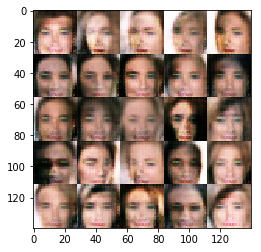


 In epoch 1/1 and step 2300 The discriminator Loss is 1.28995... The generator Loss is 0.57740

 In epoch 1/1 and step 2310 The discriminator Loss is 1.32614... The generator Loss is 0.74447

 In epoch 1/1 and step 2320 The discriminator Loss is 1.18919... The generator Loss is 0.72923

 In epoch 1/1 and step 2330 The discriminator Loss is 1.29675... The generator Loss is 1.18616

 In epoch 1/1 and step 2340 The discriminator Loss is 1.51133... The generator Loss is 0.58977

 In epoch 1/1 and step 2350 The discriminator Loss is 1.48222... The generator Loss is 0.72670

 In epoch 1/1 and step 2360 The discriminator Loss is 1.23741... The generator Loss is 0.90602

 In epoch 1/1 and step 2370 The discriminator Loss is 1.34363... The generator Loss is 0.55186

 In epoch 1/1 and step 2380 The discriminator Loss is 1.31361... The generator Loss is 0.64748

 In epoch 1/1 and step 2390 The discriminator Loss is 1.38245... The generator Loss is 0.66390


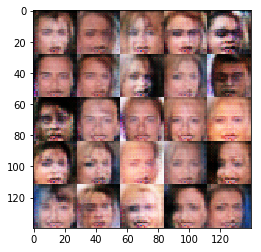


 In epoch 1/1 and step 2400 The discriminator Loss is 1.31289... The generator Loss is 0.85607

 In epoch 1/1 and step 2410 The discriminator Loss is 1.21516... The generator Loss is 1.22349

 In epoch 1/1 and step 2420 The discriminator Loss is 1.46298... The generator Loss is 0.51861

 In epoch 1/1 and step 2430 The discriminator Loss is 1.08149... The generator Loss is 0.91339

 In epoch 1/1 and step 2440 The discriminator Loss is 1.28112... The generator Loss is 0.67460

 In epoch 1/1 and step 2450 The discriminator Loss is 1.21886... The generator Loss is 0.94200

 In epoch 1/1 and step 2460 The discriminator Loss is 1.43405... The generator Loss is 0.57575

 In epoch 1/1 and step 2470 The discriminator Loss is 1.24194... The generator Loss is 1.07543

 In epoch 1/1 and step 2480 The discriminator Loss is 1.66101... The generator Loss is 0.46069

 In epoch 1/1 and step 2490 The discriminator Loss is 1.22181... The generator Loss is 0.79927


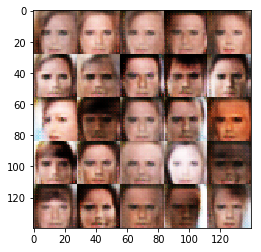


 In epoch 1/1 and step 2500 The discriminator Loss is 1.52270... The generator Loss is 0.47025

 In epoch 1/1 and step 2510 The discriminator Loss is 1.41502... The generator Loss is 0.53645

 In epoch 1/1 and step 2520 The discriminator Loss is 1.17259... The generator Loss is 1.29003

 In epoch 1/1 and step 2530 The discriminator Loss is 1.40027... The generator Loss is 0.70880

 In epoch 1/1 and step 2540 The discriminator Loss is 1.32487... The generator Loss is 0.69140

 In epoch 1/1 and step 2550 The discriminator Loss is 1.11438... The generator Loss is 0.85024

 In epoch 1/1 and step 2560 The discriminator Loss is 1.39885... The generator Loss is 0.55969

 In epoch 1/1 and step 2570 The discriminator Loss is 1.16449... The generator Loss is 0.79976

 In epoch 1/1 and step 2580 The discriminator Loss is 1.44126... The generator Loss is 0.52148

 In epoch 1/1 and step 2590 The discriminator Loss is 1.44906... The generator Loss is 1.53022


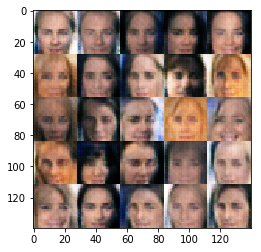


 In epoch 1/1 and step 2600 The discriminator Loss is 1.25339... The generator Loss is 1.45449

 In epoch 1/1 and step 2610 The discriminator Loss is 1.03787... The generator Loss is 1.21126

 In epoch 1/1 and step 2620 The discriminator Loss is 1.22664... The generator Loss is 0.73642

 In epoch 1/1 and step 2630 The discriminator Loss is 0.93819... The generator Loss is 1.21539

 In epoch 1/1 and step 2640 The discriminator Loss is 1.14484... The generator Loss is 0.88164

 In epoch 1/1 and step 2650 The discriminator Loss is 1.23312... The generator Loss is 0.81110

 In epoch 1/1 and step 2660 The discriminator Loss is 1.18587... The generator Loss is 0.82262

 In epoch 1/1 and step 2670 The discriminator Loss is 1.18913... The generator Loss is 0.79183

 In epoch 1/1 and step 2680 The discriminator Loss is 1.18586... The generator Loss is 0.79573

 In epoch 1/1 and step 2690 The discriminator Loss is 1.18344... The generator Loss is 0.79456

 In epoch 1/1... The discriminator Loss

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.01
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.